In [194]:
import numpy as np
from pybaseball import statcast
from pybaseball import cache
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
cache.enable()

In [178]:
main_data = statcast("2018-04-02", "2020-12-31")

This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates


100%|██████████| 532/532 [02:31<00:00,  3.51it/s]


In [149]:
main_data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
77,FF,2020-10-27,96.7,1.58,5.99,"Urías, Julio",642715,628711,strikeout,called_strike,<NA>,<NA>,<NA>,<NA>,4,Willy Adames called out on strikes.,W,R,L,LAD,TB,S,2,None,0,2,2020,0.18,1.63,-0.53,2.29,<NA>,<NA>,<NA>,2,9,Top,<NA>,<NA>,<NA>,<NA>,605131,<NA>,<NA>,-5.950264,-140.490456,-7.897391,3.772,32.321911,-8.981441,3.5,1.69,<NA>,<NA>,<NA>,95.4,2615,5.7,635886,628711,605131,571970,571771,621458,608369,621035,641355,605141,54.82,<NA>,<NA>,0.0,1,0,0,<NA>,65,3,4-Seam Fastball,3,1,1,3,1,3,1,3,Standard,Standard,149,0.011,-0.067
81,SI,2020-10-27,94.1,2.91,5.45,"Urías, Julio",642715,628711,None,called_strike,<NA>,<NA>,<NA>,<NA>,1,Willy Adames called out on strikes.,W,R,L,LAD,TB,S,<NA>,None,0,1,2020,0.75,1.3,-0.55,3.03,<NA>,<NA>,<NA>,2,9,Top,<NA>,<NA>,<NA>,<NA>,605131,<NA>,<NA>,-10.560246,-136.599519,-3.429867,11.723598,29.18381,-15.237217,3.49,1.69,<NA>,<NA>,<NA>,93.4,2470,5.9,635886,628711,605131,571970,571771,621458,608369,621035,641355,605141,54.59,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,65,2,Sinker,3,1,1,3,1,3,1,3,Standard,Standard,127,0.0,-0.027
83,FF,2020-10-27,94.9,1.77,6.02,"Urías, Julio",642715,628711,None,swinging_strike,<NA>,<NA>,<NA>,<NA>,2,Willy Adames called out on strikes.,W,R,L,LAD,TB,S,<NA>,None,0,0,2020,0.23,1.47,-0.04,3.32,<NA>,<NA>,<NA>,2,9,Top,<NA>,<NA>,<NA>,<NA>,605131,<NA>,<NA>,-5.199252,-138.098234,-4.63797,4.158758,30.838499,-12.535677,3.5,1.69,<NA>,<NA>,<NA>,94.0,2397,5.7,635886,628711,605131,571970,571771,621458,608369,621035,641355,605141,54.76,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,65,1,4-Seam Fastball,3,1,1,3,1,3,1,3,Standard,Standard,147,0.0,-0.017
86,FF,2020-10-27,94.4,1.66,5.93,"Urías, Julio",670712,628711,strikeout,called_strike,<NA>,<NA>,<NA>,<NA>,4,Mike Brosseau called out on strikes.,W,R,L,LAD,TB,S,2,None,3,2,2020,0.27,1.5,-0.37,2.15,<NA>,<NA>,<NA>,1,9,Top,<NA>,<NA>,<NA>,<NA>,605131,<NA>,<NA>,-5.843595,-137.294295,-7.414897,4.754147,30.016237,-11.778755,3.24,1.53,<NA>,<NA>,<NA>,93.7,2508,5.9,635886,628711,605131,571970,571771,621458,608369,621035,641355,605141,54.6,<NA>,<NA>,0.0,1,0,0,<NA>,64,6,4-Seam Fastball,3,1,1,3,1,3,1,3,Standard,Standard,153,0.023,-0.208
90,CU,2020-10-27,81.4,1.46,6.06,"Urías, Julio",670712,628711,None,ball,<NA>,<NA>,<NA>,<NA>,13,Mike Brosseau called out on strikes.,W,R,L,LAD,TB,B,<NA>,None,2,2,2020,-1.67,-0.15,-0.14,0.96,<NA>,<NA>,<NA>,1,9,Top,<NA>,<NA>,<NA>,<NA>,605131,<NA>,<NA>,-0.383207,-118.44781,-4.454166,-15.553576,24.451936,-32.892744,3.2,1.53,<NA>,<NA>,<NA>,80.2,3031,5.7,635886,628711,605131,571970,571771,621458,608369,621035,641355,605141,54.84,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,64,5,Curveball,3,1,1,3,1,3,1,3,Standard,Standard,308,0.0,0.06


In [150]:
num_var = main_data[['release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'launch_speed', 
              'launch_angle', 'effective_speed', 'release_spin_rate', 'release_extension', 'release_pos_y', 'spin_axis']]
num_var.describe().T

,count,mean,std,min,25%,50%,75%,max
release_speed,1712311.0,88.636165,5.952906,38.100000,84.400000,89.800000,93.300000,105.000000
release_pos_x,1712271.0,-0.761515,1.957988,-5.380000,-2.170000,-1.520000,1.180000,11.630000
release_pos_z,1712271.0,5.874128,0.517480,0.110000,5.610000,5.910000,6.200000,10.540000
pfx_x,1712271.0,-0.145475,0.863604,-2.780000,-0.880000,-0.240000,0.540000,2.560000
pfx_z,1712271.0,0.650880,0.743564,-4.470000,0.220000,0.790000,1.250000,5.390000
plate_x,1712271.0,0.039129,0.857075,-9.670000,-0.550000,0.040000,0.630000,7.010000
plate_z,1712271.0,2.244370,0.960473,-4.520000,1.630000,2.250000,2.870000,13.580000
vx0,1712271.0,2.319518,6.002118,-20.095413,-2.558768,4.116492,6.712618,19.837779
vy0,1712271.0,-128.861386,8.637904,-152.936501,-135.663394,-130.536497,-122.786805,-54.554375
vz0,1712271.0,-4.158159,3.043355,-19.919902,-6.215629,-4.311892,-2.269138,20.095250


In [151]:
cat_var = main_data[['pitch_type', 'zone', 'p_throws', 'stand', 'pitch_name']]
for i in cat_var:
    print()
    print(cat_var[i].value_counts())
    print('---------------------------------------------')


FF    606969
SI    299281
SL    297355
CH    184316
CU    145120
FC    107162
KC     43239
FS     26133
KN       901
FA       768
CS       338
EP       273
FO       111
PO        85
SC        37
Name: pitch_type, dtype: int64
---------------------------------------------

14    329486
13    231023
11    184882
12    141701
5     122671
8     107459
6     103542
4     101323
9      97843
7      84275
2      79385
1      67618
3      61063
Name: zone, dtype: Int64
---------------------------------------------

R    1265506
L     490605
Name: p_throws, dtype: int64
---------------------------------------------

R    1025321
L     730790
Name: stand, dtype: int64
---------------------------------------------

4-Seam Fastball    606969
Sinker             299281
Slider             297355
Changeup           184316
Curveball          145458
Cutter             107162
Knuckle Curve       43239
Split-Finger        26133
Knuckleball           901
Fastball              768
Eephus                27

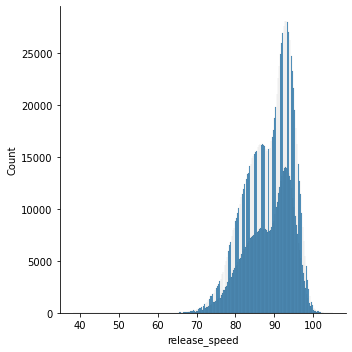

In [152]:
import seaborn as sns

sns.displot(main_data.release_speed)

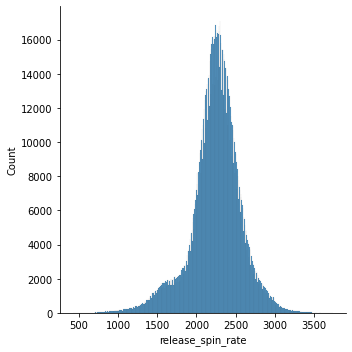

In [153]:
sns.displot(main_data.release_spin_rate)

In [302]:
data = main_data
data = data.loc[data['description'].isin(['swinging_strike', 'foul', 'hit_into_play'])]
data = data[data.pitch_name != 'Forkball']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792541 entries, 83 to 3744
Data columns (total 92 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   pitch_type                       770513 non-null  object        
 1   game_date                        792541 non-null  datetime64[ns]
 2   release_speed                    770625 non-null  Float64       
 3   release_pos_x                    770610 non-null  Float64       
 4   release_pos_z                    770610 non-null  Float64       
 5   player_name                      792541 non-null  object        
 6   batter                           792541 non-null  Int64         
 7   pitcher                          792541 non-null  Int64         
 8   events                           367089 non-null  object        
 9   description                      792541 non-null  object        
 10  spin_dir                         0 non-null  

In [303]:
data['whiff'] = np.where(data['description'] == 'swinging_strike', 1, 0)
data['on1'] = np.where(pd.notnull(data['on_1b']), 1, 0)
data['on2'] = np.where(pd.notnull(data['on_2b']), 1, 0)
data['on3'] = np.where(pd.notnull(data['on_3b']), 1, 0)
data.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [362]:
cols_to_use = ['player_name', 'pitcher', 'pitch_name', 'release_pos_x', 'release_pos_z', 'release_speed', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'outs_when_up', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'effective_speed', 'release_spin_rate', 'release_extension', 'release_pos_y', 'zone', 'p_throws', 'stand', 'pitch_number', 'spin_axis', 'on1', 'on2', 'on3', 'whiff']

In [305]:
data = data[cols_to_use]

In [306]:
data = data.dropna()

In [310]:
X = data.drop(['whiff'], 1)
y = data.whiff

/var/folders/w3/7q3wzvhj48n9gsxkkfks4zq00000gn/T/ipykernel_83212/1095148750.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop(['whiff'], 1)


In [311]:
X = pd.get_dummies(X, columns=['pitch_name', 'zone', 'p_throws', 'stand'])
feature_names = X.columns.tolist()
X = X.to_numpy()

In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 21)


In [313]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(use_label_encoder=False)
xgb_cl.fit(X_train, y_train)

[21:49:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [314]:
from sklearn.metrics import accuracy_score

preds = xgb_cl.predict(X_test)
accuracy_score(y_test, preds)

0.8006598398284943

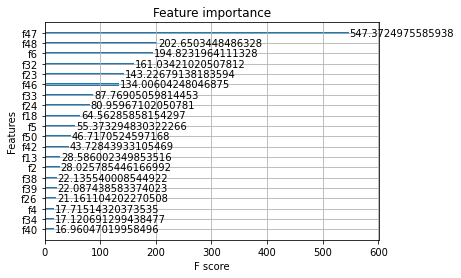

In [315]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_cl, max_num_features=20, importance_type = 'gain')
plt.show()

In [363]:
data_2021 = statcast('2021-04-02', '2021-11-30')

This is a large query, it may take a moment to complete
Skipping offseason dates


100%|██████████| 228/228 [01:02<00:00,  3.66it/s]


In [364]:
data_2021 = data_2021.loc[data_2021['description'].isin(['swinging_strike', 'foul', 'hit_into_play'])]
data_2021['whiff'] = np.where(data_2021['description'] == 'swinging_strike', 1, 0)
data_2021['on1'] = np.where(pd.notnull(data_2021['on_1b']), 1, 0)
data_2021['on2'] = np.where(pd.notnull(data_2021['on_2b']), 1, 0)
data_2021['on3'] = np.where(pd.notnull(data_2021['on_3b']), 1, 0)

In [365]:
data_2021 = data_2021[cols_to_use]
data_2021 = data_2021.dropna()
X_2021 = data_2021.drop(['whiff', 'player_name', 'pitcher'], axis=1)
y_2021 = data_2021.whiff
X_2021 = pd.get_dummies(X_2021, columns=['pitch_name', 'zone', 'p_throws', 'stand'])
print(X_2021.columns)
X_2021 = X_2021.to_numpy()

Index(['release_pos_x', 'release_pos_z', 'release_speed', 'pfx_x', 'pfx_z',
       'plate_x', 'plate_z', 'outs_when_up', 'vx0', 'vy0', 'vz0', 'ax', 'ay',
       'az', 'effective_speed', 'release_spin_rate', 'release_extension',
       'release_pos_y', 'pitch_number', 'spin_axis', 'on1', 'on2', 'on3',
       'pitch_name_4-Seam Fastball', 'pitch_name_Changeup',
       'pitch_name_Curveball', 'pitch_name_Cutter', 'pitch_name_Eephus',
       'pitch_name_Fastball', 'pitch_name_Knuckle Curve',
       'pitch_name_Knuckleball', 'pitch_name_Screwball', 'pitch_name_Sinker',
       'pitch_name_Slider', 'pitch_name_Split-Finger', 'zone_1', 'zone_2',
       'zone_3', 'zone_4', 'zone_5', 'zone_6', 'zone_7', 'zone_8', 'zone_9',
       'zone_11', 'zone_12', 'zone_13', 'zone_14', 'p_throws_L', 'p_throws_R',
       'stand_L', 'stand_R'],
      dtype='object')


In [366]:
y_pred_2021 = xgb_cl.predict_proba(X_2021)

In [367]:
y_pred_2021 = y_pred_2021.tolist()
y_pred_2021 = [l[1] for l in y_pred_2021]

In [368]:
data_2021['predicted_whiff'] = y_pred_2021
data_2021['resid'] = data_2021['whiff'] - data_2021['predicted_whiff']

In [369]:
data_2021[['whiff', 'predicted_whiff', 'resid']].head(30)

,whiff,predicted_whiff,resid
114,0,0.101409,-0.101409
121,0,0.071574,-0.071574
132,0,0.078206,-0.078206
168,0,0.201073,-0.201073
176,0,0.266078,-0.266078
210,0,0.077310,-0.077310
243,0,0.119877,-0.119877
187,0,0.857509,-0.857509
201,0,0.236142,-0.236142
240,0,0.096592,-0.096592


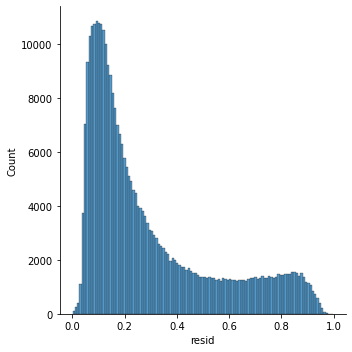

In [370]:
sns.displot(data_2021.resid.abs())

In [383]:
pitchers = data_2021[['player_name', 'pitcher', 'whiff', 'predicted_whiff', 'resid']].groupby('player_name').agg({'pitcher' : 'count', 'whiff' : 'sum', 'predicted_whiff' : 'sum', 'resid' : 'sum'}).reset_index().rename(columns={'pitcher' : 'total_swings'})
pitchers['whiff_rate'] = pitchers['whiff'] / pitchers['total_swings']
pitchers['expected_whiff_rate'] = pitchers['predicted_whiff'] / pitchers['total_swings']
pitchers['WROE'] = pitchers['whiff_rate'] - pitchers['expected_whiff_rate']
pitchers['WOE'] = pitchers['whiff'] - pitchers['predicted_whiff']
WROE_df = pitchers[['player_name', 'total_swings', 'whiff', 'predicted_whiff', 'WOE', 'whiff_rate', 'expected_whiff_rate', 'WROE']].sort_values('WOE', ascending=False).reset_index()
WROE_df = WROE_df[WROE_df['total_swings'] > 300]
WROE_df.head(20)

,index,player_name,total_swings,whiff,predicted_whiff,WOE,whiff_rate,expected_whiff_rate,WROE
0,116,"Burnes, Corbin",1222,405,353.021236,51.978764,0.331424,0.288888,0.042536
1,885,"Woodruff, Brandon",1381,354,305.947528,48.052472,0.256336,0.221541,0.034795
2,715,"Sandoval, Patrick",648,209,161.084040,47.915960,0.322531,0.248586,0.073944
3,566,"Márquez, Germán",1209,292,244.339192,47.660808,0.241522,0.202100,0.039422
4,573,"Neris, Héctor",581,189,141.551674,47.448326,0.325301,0.243635,0.081667
5,414,"Kershaw, Clayton",825,270,223.893293,46.106707,0.327273,0.271386,0.055887
6,383,"Iglesias, Raisel",531,203,157.309262,45.690738,0.382298,0.296251,0.086047
7,663,"Ray, Robbie",1566,465,421.195006,43.804994,0.296935,0.268962,0.027973
8,728,"Scherzer, Max",1508,480,437.773911,42.226089,0.318302,0.290301,0.028001
9,793,"Suárez, Ranger",721,175,133.048720,41.951280,0.242718,0.184534,0.058185


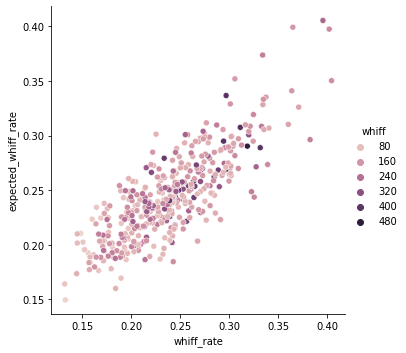

In [391]:
corbin_data = data_2021[data_2021['player_name'] == 'Burnes, Corbin'].reset_index()
sns.relplot(data=WROE_df, x='whiff_rate', y='expected_whiff_rate', hue='whiff')